**Proyek: Analisis Data Penjualan Video Game 🎮**

**melakukan analisis eksplorasi pada dataset penjualan video game global.**

---

**Menggunakan pengetahuan EDA untuk menjawab pertanyaan-pertanyaan analisis. Tulis kode Python (menggunakan pandas dan seaborn) untuk setiap langkah.**


**1: Memuat dan Mengenal Data**

- Muat dataset vgsales.csv ke dalam DataFrame pandas.
- Tampilkan 5 baris pertama untuk memahami strukturnya.
- Gunakan .info() untuk memeriksa tipe data dan nilai yang hilang. Apakah ada kolom yang tipe datanya perlu diubah?

In [49]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("willianoliveiragibin/video-game-sales-analyze")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\willianoliveiragibin\video-game-sales-analyze\versions\1


In [50]:
import os

# 'path' adalah variabel yang sama dari kode kagglehub Anda
# Kode ini akan membuat daftar semua file yang ada di dalam FOLDER 'path'
try:
    file_list = os.listdir(path)
    print("File di dalam folder dataset:")
    print(file_list)
except Exception as e:
    print("Terjadi error:", e)
    print("\nPastikan variabel 'path' Anda sudah benar dari langkah sebelumnya.")

File di dalam folder dataset:
['vgsales new.csv']


In [51]:
import pandas as pd 

# --- Pengaturan Tampilan Pandas ---
# Menjalankan ini sekali akan membuat semua output tabel lebih rapi
# Perintah untuk menampilkan semua kolom (tidak ada yang disembunyikan dengan '...')
pd.set_option('display.max_columns', None)
# Perintah untuk memperlebar tampilan output agar tidak terpotong ke bawah
pd.set_option('display.width', 1000)


# Variabel 'path' adalah lokasi folder dari kode kagglehub
# Kita gabungkan path folder dengan nama file untuk mendapatkan lokasi file yang lengkap
file_path = os.path.join(path, 'vgsales new.csv')

# Sekarang kita baca file CSV itu menggunakan Pandas
try:
    vg_store_df = pd.read_csv(file_path)
    
    # Mari kita tampilkan 5 baris pertama dari data kita untuk memastikan semuanya berhasil
    print("Selamat! Data berhasil dimuat. Ini 5 baris pertamanya:")
    print('=' * 50)
    print(vg_store_df.head())
    
except FileNotFoundError:
    print("Error: File tidak ditemukan. Pastikan nama file  sudah benar.")
except Exception as e:
    print("Terjadi error lain:", e)



Selamat! Data berhasil dimuat. Ini 5 baris pertamanya:
   Rank             Name Platform    Year     Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0   259        Asteroids     2600  1980.0   Shooter       Atari      4.00      0.26       0.0         0.05          4.31
1   545  Missile Command     2600  1980.0   Shooter       Atari      2.56      0.17       0.0         0.03          2.76
2  1768          Kaboom!     2600  1980.0      Misc  Activision      1.07      0.07       0.0         0.01          1.15
3  1971         Defender     2600  1980.0      Misc       Atari      0.99      0.05       0.0         0.01          1.05
4  2671           Boxing     2600  1980.0  Fighting  Activision      0.72      0.04       0.0         0.01          0.77


---

**Dataset (Hipotetis):**

- Rank: Peringkat penjualan keseluruhan.
- Name: Nama game.
- Platform: Konsol tempat game dirilis (misalnya, 'PS4', 'XOne', 'PC').
- Year: Tahun rilis game.
- Genre: Genre game (misalnya, 'Action', 'Sports', 'RPG').
- Publisher: Perusahaan yang menerbitkan game.
- Global_Sales: Total penjualan di seluruh dunia (dalam jutaan).

---

In [52]:
#memahami struktur dataset
print('=' * 50)
vg_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [53]:
# mengubah Dtype Year ke int
vg_store_df['Year'] = vg_store_df['Year'].astype('Int64')
vg_store_df.dtypes


Rank              int64
Name             object
Platform         object
Year              Int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [54]:
vg_store_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


----

**2: Validasi dan Pembersihan Data**

- Periksa rentang tahun (Year). Apakah ada tahun yang tidak masuk akal?
- Periksa kategori unik di kolom Genre dan Platform. Apakah ada nama yang tampaknya salah ketik atau tidak konsisten? (Untuk tantangan ini, asumsikan datanya bersih).
- Apakah ada nilai yang hilang? Jika ada di kolom Year, putuskan strategi untuk menanganinya (misalnya, menghapus baris tersebut).


In [55]:
#periksa rentang tahun (year)
print("Tahun minimun:", vg_store_df['Year'].min())
print("Tahun Maksimum:", vg_store_df['Year'].max())
print("rentang Tahun Masuk akal")

print('=' * 50)

#Periksa Kategori Unik di genre dan Platform mungkin ada kesalahan ketik atau tidak konsisten
print('Mengasumsikan data sudah bersih')
print(vg_store_df['Genre'].unique())
#mengubah type data supaya hemat memory
vg_store_df['Genre'] = vg_store_df['Genre'].astype('category')

print('=' * 50)

print(vg_store_df['Platform'].unique())
vg_store_df['Platform'] = vg_store_df['Platform'].astype('category')
print('=' * 50)
vg_store_df.dtypes


print('=' * 50)
#memeriksa nilai yang hilang 
vg_store_df.isna().sum()



Tahun minimun: 1980
Tahun Maksimum: 2020
rentang Tahun Masuk akal
Mengasumsikan data sudah bersih
['Shooter' 'Misc' 'Fighting' 'Sports' 'Action' 'Platform' 'Puzzle'
 'Racing' 'Simulation' 'Adventure' 'Role-Playing' 'Strategy']
['2600' 'NES' 'PC' 'DS' 'GB' 'SNES' 'GEN' 'GG' 'SCD' 'NG' 'PS' 'SAT' '3DO'
 'TG16' 'N64' 'PCFX' 'DC' 'WS' 'PS2' 'XB' 'GBA' 'GC' 'PSP' 'X360' 'Wii'
 'PS3' '3DS' 'PSV' 'WiiU' 'PS4' 'XOne']


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [56]:
# menghapus kolom nan dari kedua kolom karna persentasenya sangat kecil jadi aman
vg_store_df = vg_store_df.dropna(subset=['Year', 'Publisher'])
vg_store_df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

**simpan ke format dataset baru hasil validate and cleaning**


In [62]:
vg_store_df.to_csv('df_clean_vg_store.csv', index=False)

# back to display csv
df_clean = pd.read_csv('df_clean_vg_store.csv')
df_clean.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


---

**3: Analisis Deskriptif dan Ringkasan**

- Platform game mana yang paling banyak muncul di dataset?
- Gunakan .describe() untuk mendapatkan ringkasan statistik dari Global_Sales dan Year. Apa rata-rata penjualan global?
- Hitung total penjualan global untuk setiap Genre. Genre mana yang memiliki total penjualan tertinggi?
- Buat ringkasan yang menunjukkan rata-rata penjualan (mean), median penjualan (median), dan jumlah game (count) untuk 5 publisher teratas (berdasarkan jumlah game yang dirilis).

In [153]:
# Platform game yang paling banyak muncul di dataset atau sering dibeli
game_terlaris = df_clean['Platform'].value_counts().head(3)
print("Tiga Platform Game Terlaris", game_terlaris)

Tiga Platform Game Terlaris Platform
DS     2131
PS2    2127
PS3    1304
Name: count, dtype: int64


In [85]:
# summary statistic from GLobal Sales and Year
print('summary statistic from GLobal Sales and Year')
print(df_clean[['Global_Sales', 'Year']].describe())

summary statistic from GLobal Sales and Year
       Global_Sales          Year
count  16291.000000  16291.000000
mean       0.540910   2006.405561
std        1.567345      5.832412
min        0.010000   1980.000000
25%        0.060000   2003.000000
50%        0.170000   2007.000000
75%        0.480000   2010.000000
max       82.740000   2020.000000


In [86]:
# Menghitung total penjualan secara global berdasarkan kriteria genre
total_penjualan_berdasarkan_genre = df_clean.groupby('Genre')['Global_Sales'].sum()
print('total penjualan secara global berdasarkan kriteria genre')
total_penjualan_berdasarkan_genre

total penjualan secara global berdasarkan kriteria genre


Genre
Action          1722.84
Adventure        234.59
Fighting         444.05
Misc             789.87
Platform         829.13
Puzzle           242.21
Racing           726.76
Role-Playing     923.83
Shooter         1026.20
Simulation       389.98
Sports          1309.24
Strategy         173.27
Name: Global_Sales, dtype: float64

In [109]:
# membuat summary pusat data untuk 5 publisher teratas

#Publisher dengan game paling banyak (jumlah terbanyak game yang dirilis)
top5_publishers = df_clean['Publisher'].value_counts().head(5).index

# filter untuk mengambil nilai yang hanya dari 5 pub tersebut
df_top5 = df_clean[df_clean['Publisher'].isin(top5_publishers)]

# display summary
summary = df_top5.groupby('Publisher')['Global_Sales'].agg(['mean', 'median', 'count']).reset_index()
summary.round(2)


,Publisher,mean,median,count
0,Activision,0.75,0.28,966
1,Electronic Arts,0.82,0.47,1339
2,Konami Digital Entertainment,0.34,0.15,823
3,Namco Bandai Games,0.27,0.12,928
4,Ubisoft,0.52,0.21,918



---

**4: Visualisasi Data**

- Buat histogram untuk melihat distribusi Global_Sales. Apakah distribusinya normal?
- Buat bar plot untuk menampilkan total penjualan global per Genre.
- Buat box plot untuk membandingkan distribusi Global_Sales di antara 5 platform teratas. Platform mana yang tampaknya memiliki penjualan tertinggi secara median?

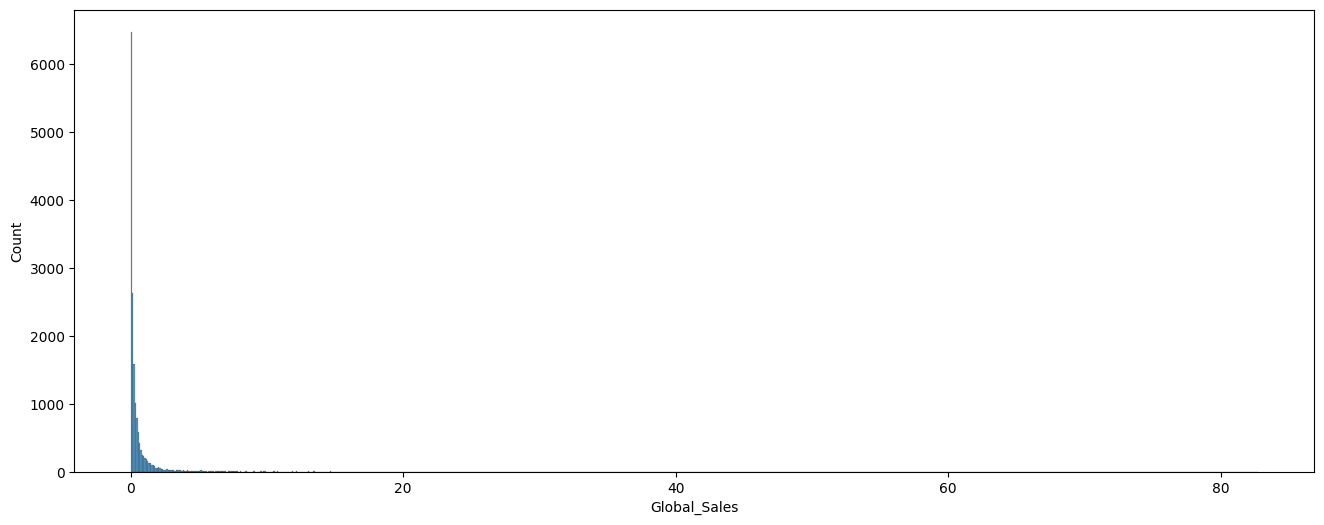

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
# histogram distribusi Global Sales
sns.histplot(data=df_clean, x='Global_Sales', binwidth=.1)
plt.show()


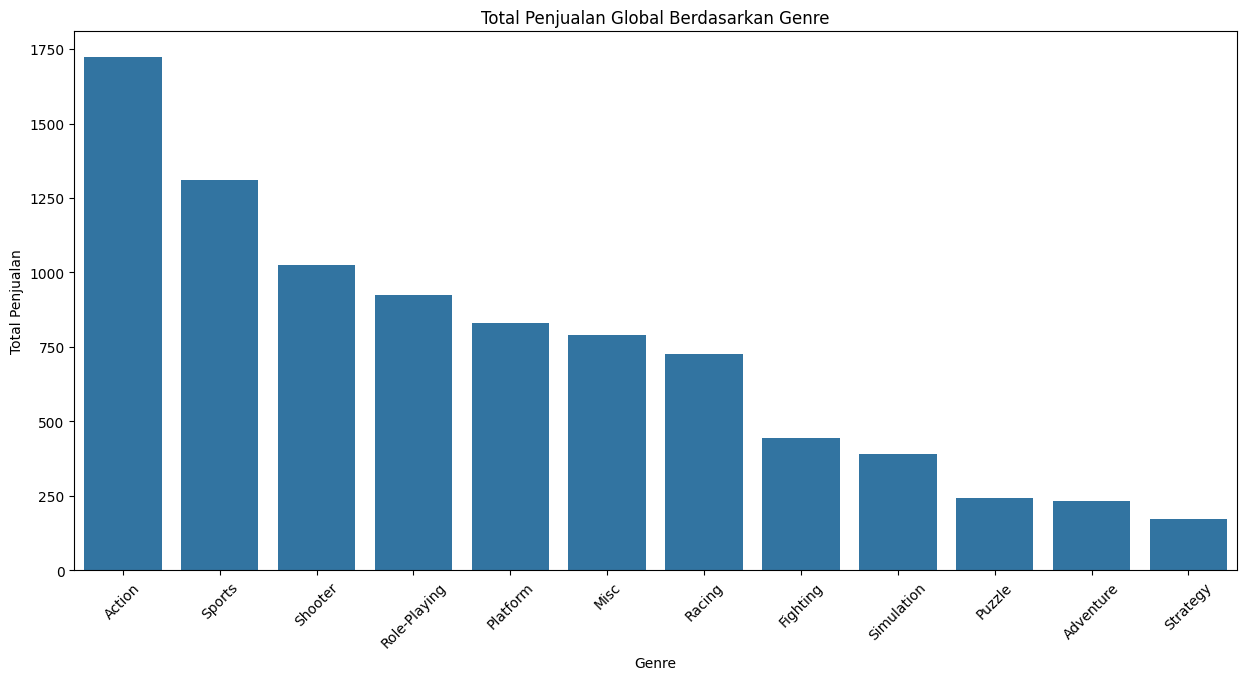

In [155]:
penjualan_genre_sorted = total_penjualan_berdasarkan_genre.sort_values(ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(x=penjualan_genre_sorted.index, y=penjualan_genre_sorted.values)

plt.title("Total Penjualan Global Berdasarkan Genre")
plt.xlabel("Genre")
plt.ylabel("Total Penjualan")
plt.xticks(rotation=45)
plt.show()

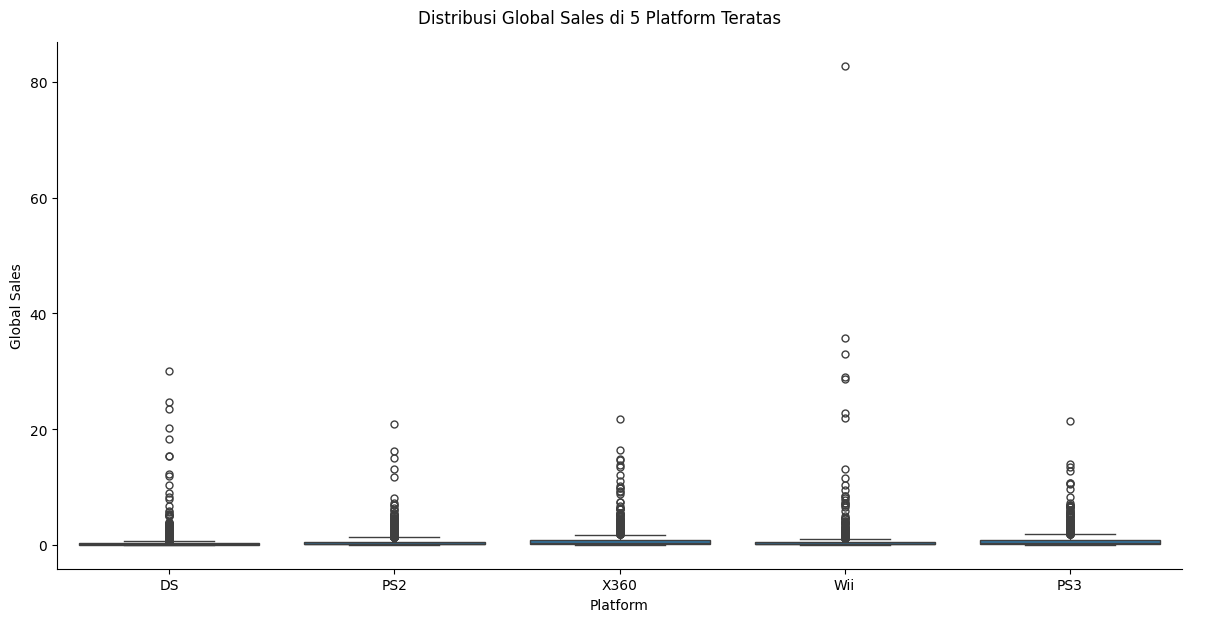

In [141]:
# box plot membandingkan distribusi Global Sales berdasarkan Platform teratas
top5_platforms = df_clean['Platform'].value_counts().head(5).index

df_top5_platforms = df_clean[df_clean['Platform'].isin(top5_platforms)]

import seaborn as sns
import matplotlib.pyplot as plt

plot = sns.catplot(kind='box', data=df_top5_platforms, x='Platform', y='Global_Sales', height=6, aspect=8/4 )

plot.fig.suptitle('Distribusi Global Sales di 5 Platform Teratas', y=1.03)
plot.set(xlabel="Platform", ylabel="Global Sales")
plt.show()


**Bonus:**
- Buat plot yang menunjukkan tren jumlah game yang dirilis dari tahun ke tahun.
- Analisis apakah ada hubungan antara Publisher dan Genre yang paling sering mereka rilis.

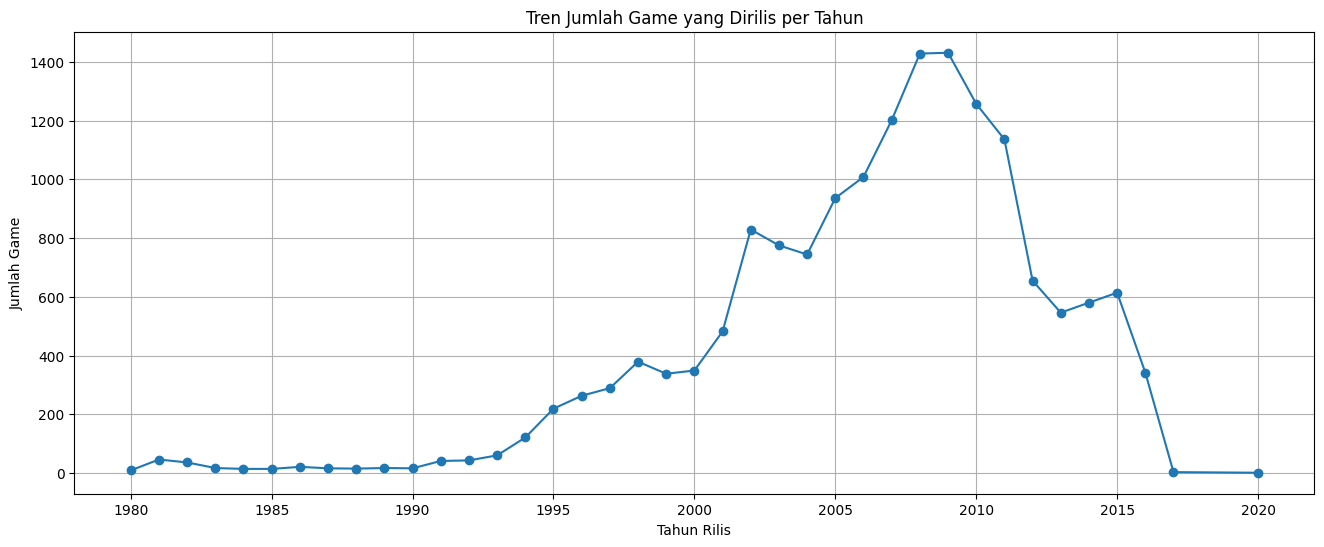

In [149]:
games_per_year = df_clean.groupby('Year')['Name'].count().reset_index()
# games_per_year.rename(columns={'Name':'Game_Count'}, inplace=True)


plt.figure(figsize=(16,6))
plt.plot(games_per_year['Year'], games_per_year['Name'], marker='o')

plt.title("Tren Jumlah Game yang Dirilis per Tahun")
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Game")
plt.grid(True)
plt.show()


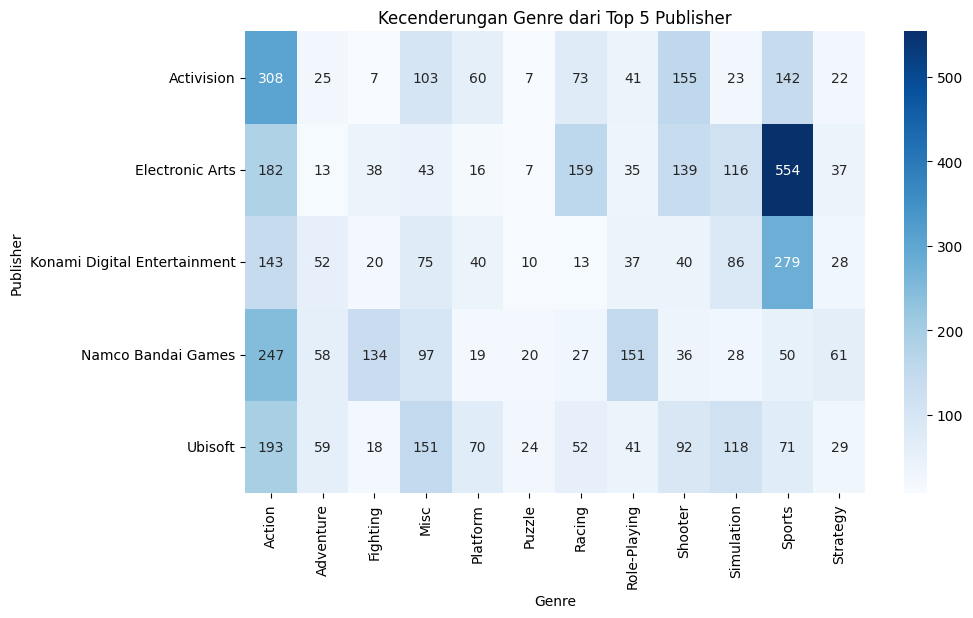

In [157]:
# buat pivot tabel
publisher_genre = pd.crosstab(df_clean['Publisher'], df_clean['Genre'])
publisher_genre.head()

#Ambil top 5
top5_publishers = df_clean['Publisher'].value_counts().head(5).index
publisher_genre_top5 = pd.crosstab(
    df_clean[df_clean['Publisher'].isin(top5_publishers)]['Publisher'],
    df_clean['Genre']
)


plt.figure(figsize=(10,6))
sns.heatmap(publisher_genre_top5, annot=True, fmt="d", cmap="Blues")

plt.title("Kecenderungan Genre dari Top 5 Publisher")
plt.ylabel("Publisher")
plt.xlabel("Genre")
plt.show()


---

**Kesimpulan Analisis**

**Dari analisis data penjualan video game global, dapat ditarik beberapa kesimpulan utama:**

- Puncak Industri Game: Tren menunjukkan bahwa industri video game mengalami pertumbuhan pesat dan mencapai puncaknya sekitar tahun 2008-2009 dalam hal jumlah game yang dirilis setiap tahun.

- Dominasi Genre Tertentu: Genre Action dan Sports adalah dua genre dengan total penjualan global tertinggi, menunjukkan selera pasar yang besar untuk kategori ini.

- Platform Legendaris: Konsol DS dan PS2 merupakan platform dengan jumlah rilis game terbanyak dalam sejarah, menandakan era keemasan mereka.

- Penjualan Tidak Merata: Distribusi penjualan sangat condong ke kanan, artinya mayoritas game terjual dalam jumlah yang wajar, namun ada beberapa judul mega-hit yang penjualannya jauh melampaui yang lain.

- Spesialisasi Publisher: Publisher besar cenderung memiliki spesialisasi. Contohnya, Electronic Arts sangat dominan di genre Sports, sementara Activision kuat di genre Action.


---